In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-dataset/heart.csv


In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


## Finding the correlation among the attributes

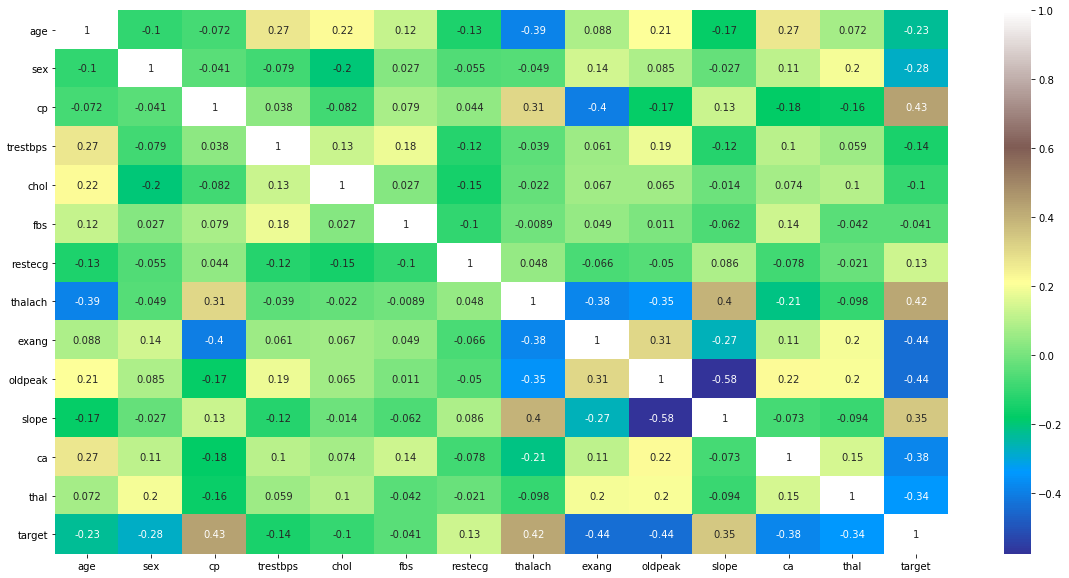

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

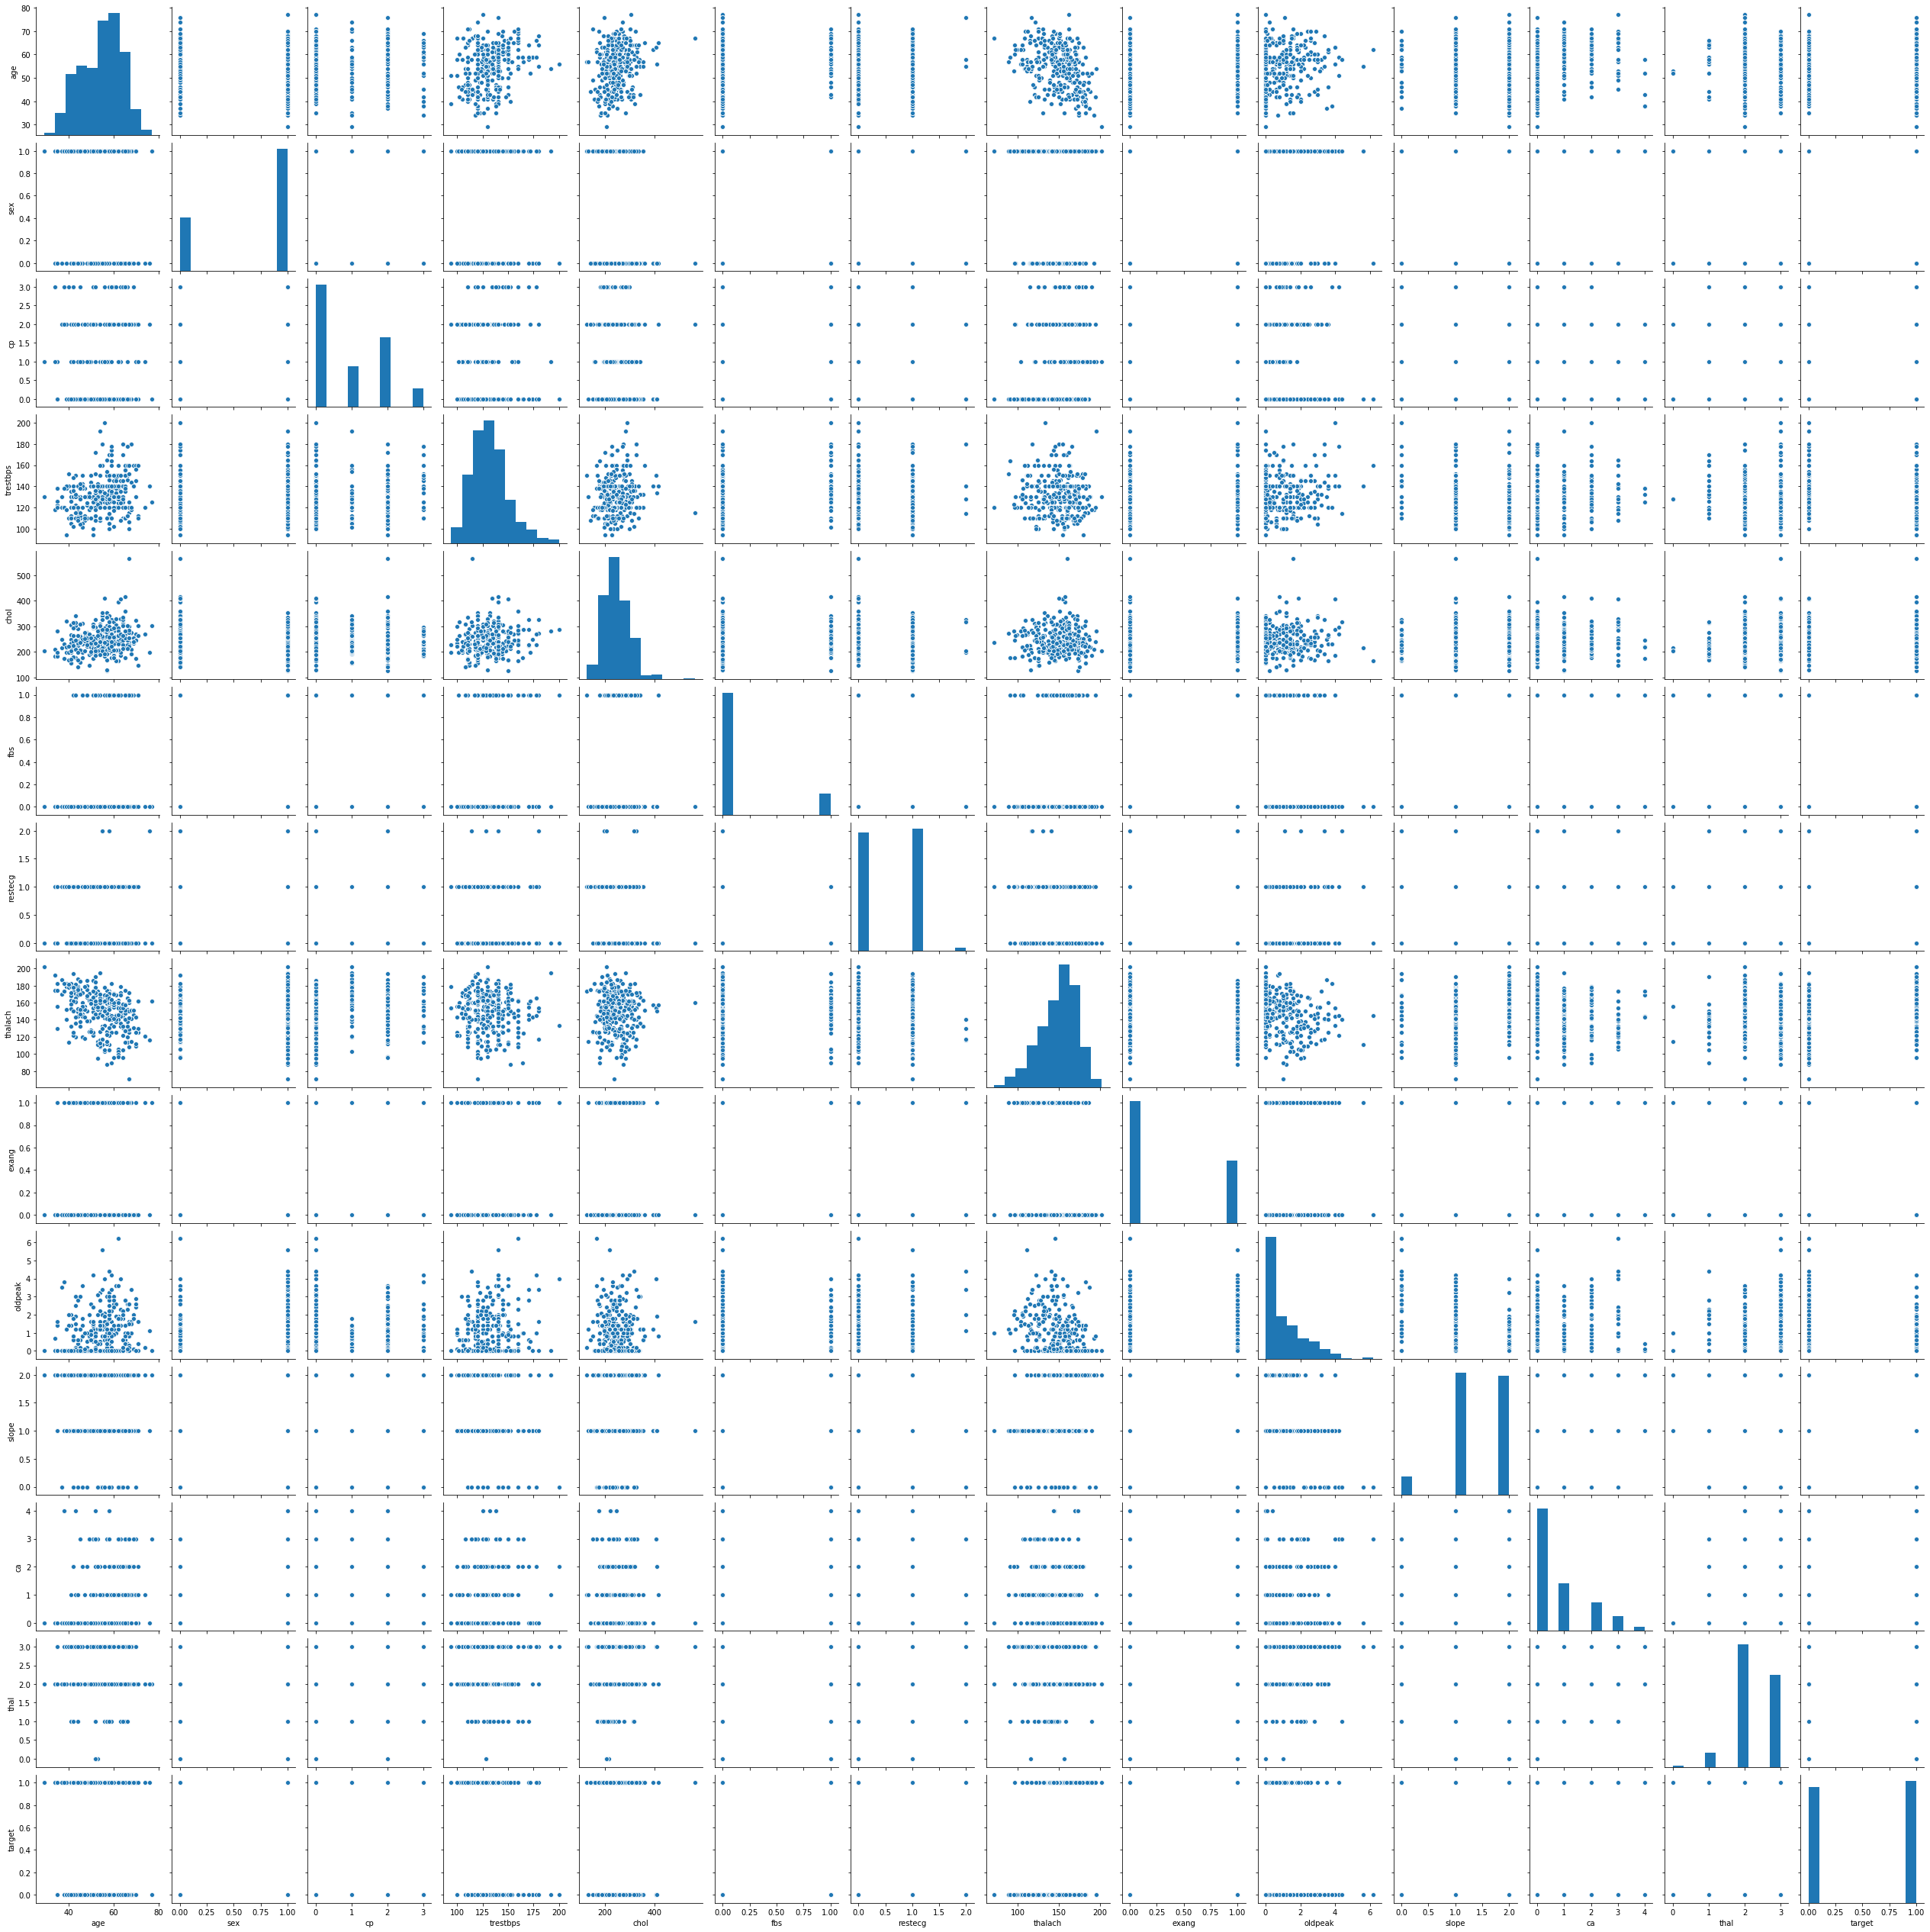

In [12]:
sns.pairplot(data=df)

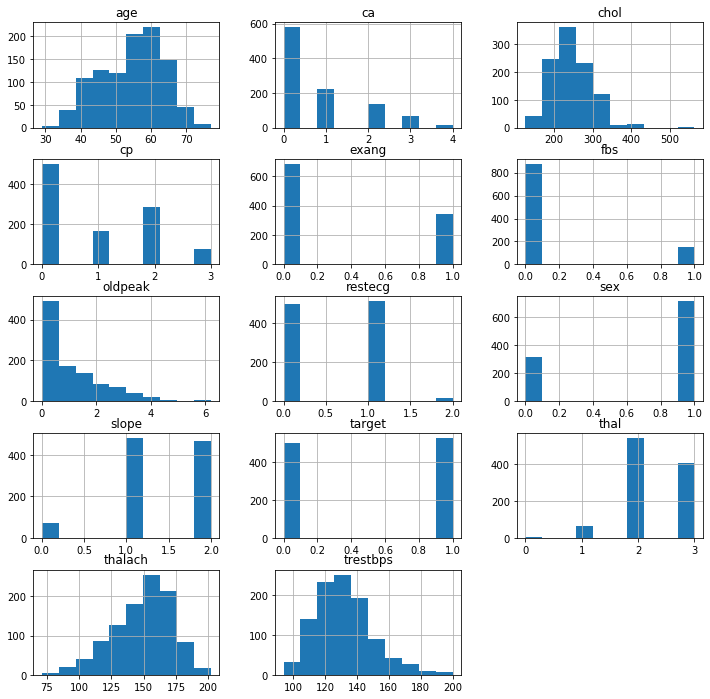

In [13]:
df.hist(figsize=(12,12), layout=(5,3));

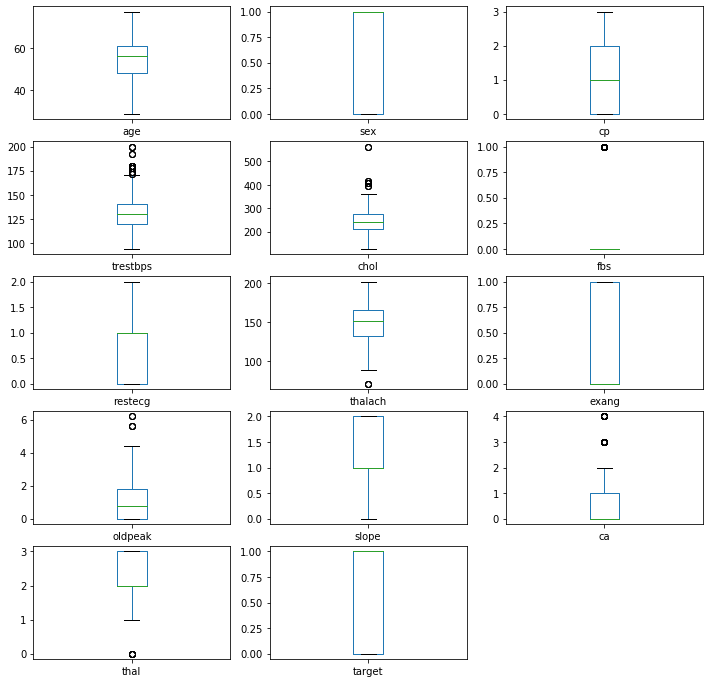

In [14]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

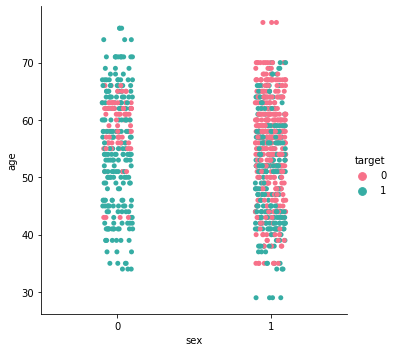

In [15]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

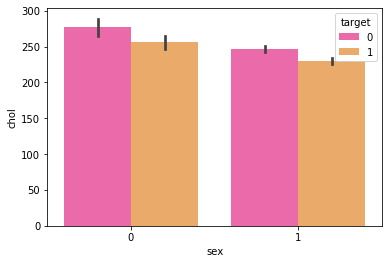

In [16]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [17]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

### 713 males and 312 females

In [18]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### 526 cases of heart diseases and 499 cases of no heart diseases

In [19]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

#### results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

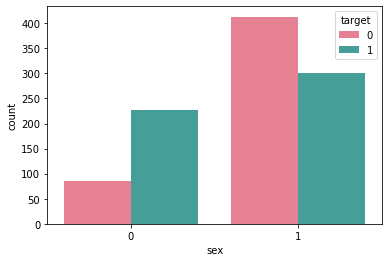

In [20]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. We observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

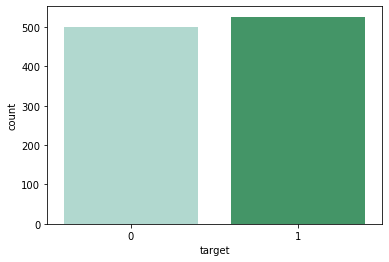

In [21]:
sns.countplot(x='target',palette='BuGn', data=df)

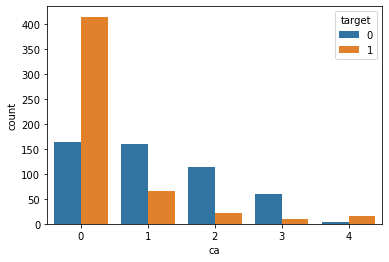

In [22]:
sns.countplot(x='ca',hue='target',data=df)

In [23]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

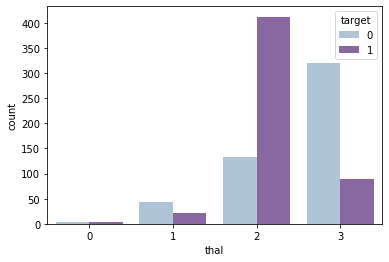

In [24]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

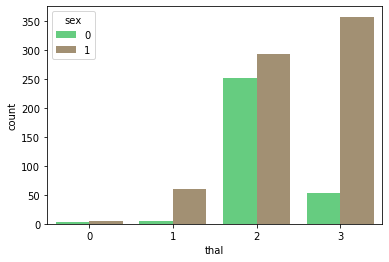

In [25]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [26]:
df['cp'].value_counts()  # chest pain type

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

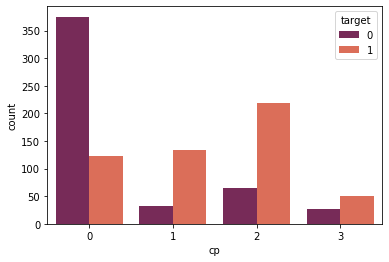

In [27]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

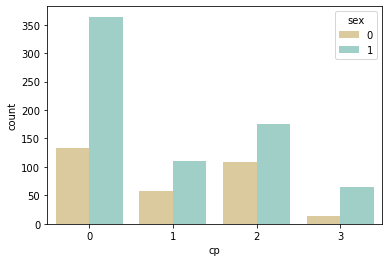

In [28]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

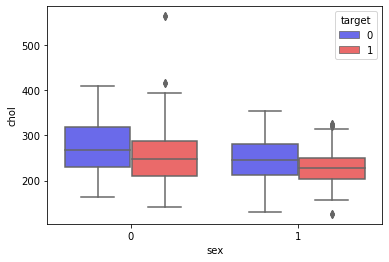

In [29]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

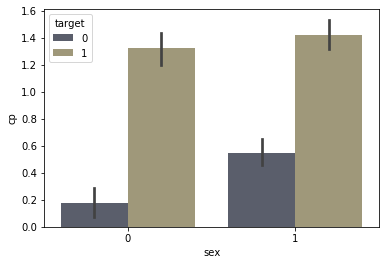

In [30]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

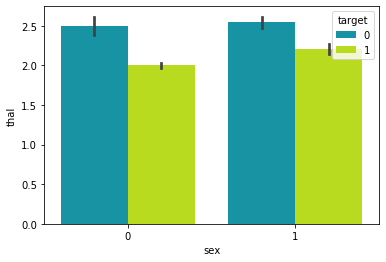

In [31]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

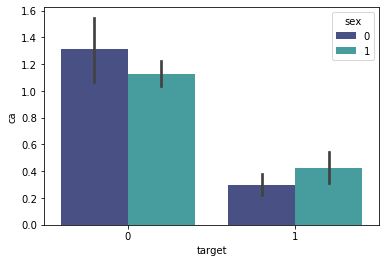

In [32]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

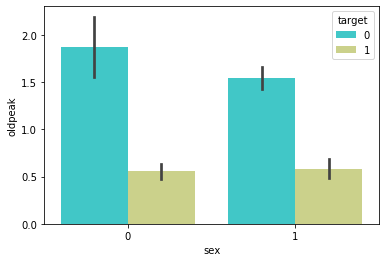

In [33]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

In [34]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

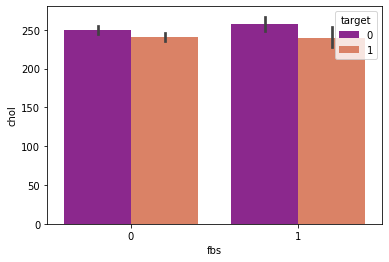

In [35]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

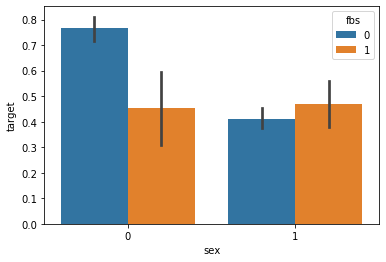

In [36]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

In [37]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0    1
sex             
0        86  226
1       413  300


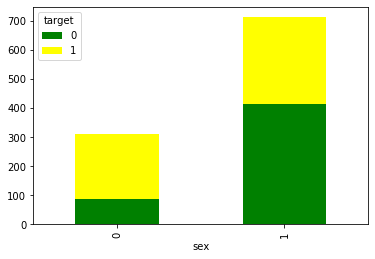

In [38]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [39]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,3,4,252,53,312
1,4,60,292,357,713
All,7,64,544,410,1025


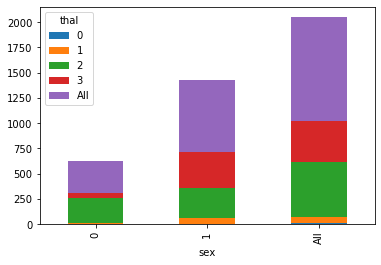

In [40]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [41]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,4,43,132,320,499
1,3,21,412,90,526
All,7,64,544,410,1025


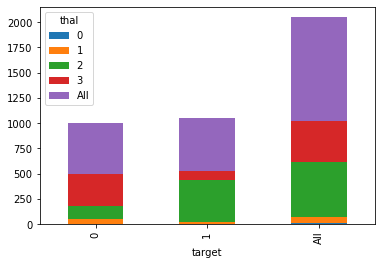

In [42]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [43]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


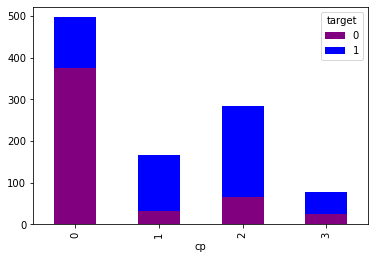

In [44]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

## Preparing the data for Model

#### Scaling the data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [47]:
X= df.drop(['target'], axis=1)
y= df['target']

## Spliting the data into test and train

In [48]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Check the sample Size¶

In [49]:

print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 9321
X_test- 4004
y_train- 717
y_test- 308


### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[115,  38],
       [ 19, 136]])

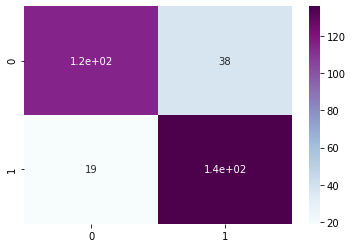

In [52]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [53]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.814935064935065


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.814935064935065

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       153
           1       0.78      0.88      0.83       155

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [57]:
cm2

array([[153,   0],
       [  3, 152]])

In [58]:
accuracy_score(y_test,prediction2)

0.9902597402597403

In [59]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.98      0.99       155

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[153,   0],
       [  0, 155]])

In [61]:
accuracy_score(y_test, prediction3)

1.0

In [62]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       155

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [65]:
cm4

array([[125,  28],
       [ 10, 145]])

In [66]:
accuracy_score(y_test, prediction4)

0.8766233766233766

In [67]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)

In [68]:
cm5

array([[114,  39],
       [ 21, 134]])

In [69]:
accuracy_score(y_test, prediction5)

0.8051948051948052

In [70]:
print('cm4', cm4)
print('-----------')
print('cm5',cm5)

cm4 [[125  28]
 [ 10 145]]
-----------
cm5 [[114  39]
 [ 21 134]]


In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[114,  39],
       [ 21, 134]])

In [72]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.827922077922078
lr : 0.814935064935065
dtc : 0.9902597402597403
rfc : 1.0
NB:  0.8766233766233766
SVC : 0.8051948051948052


## Best accuracy is given by Random Forest(rfc) : 100
### followed by Decision Tree(dtc) : 98 then NB : 87